## TSM with Lexicographic Ordering

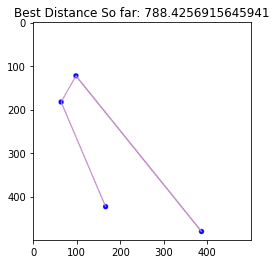

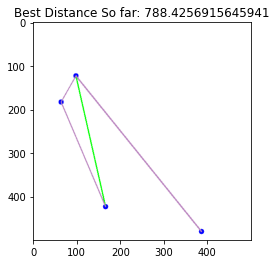

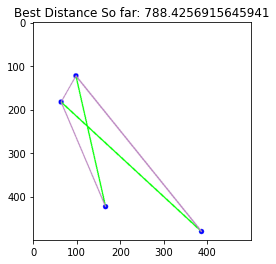

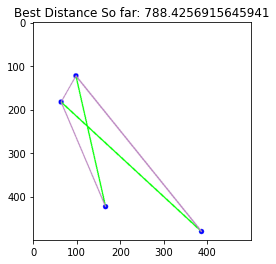

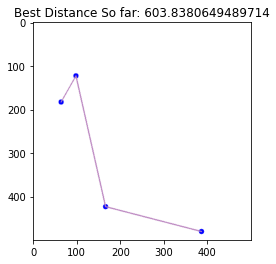

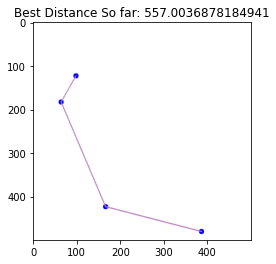

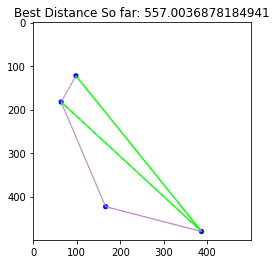

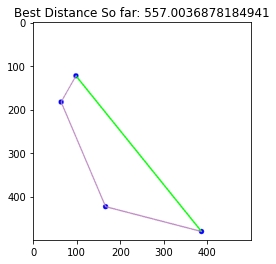

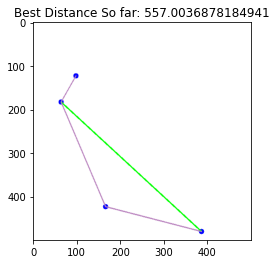

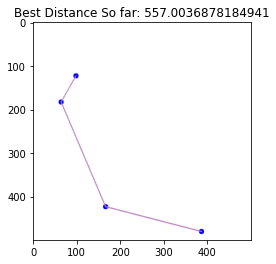

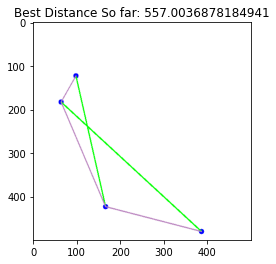

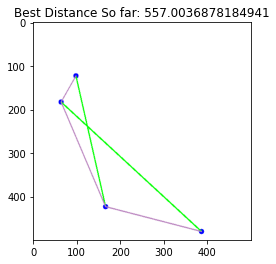

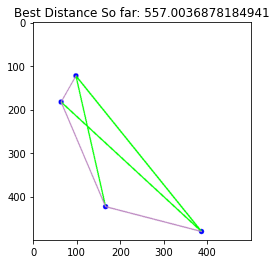

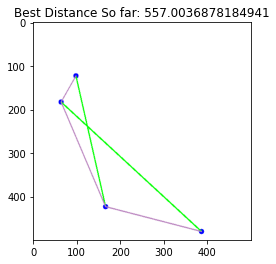

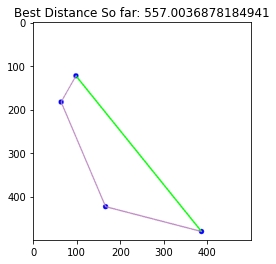

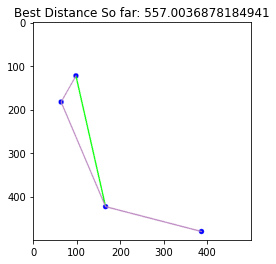

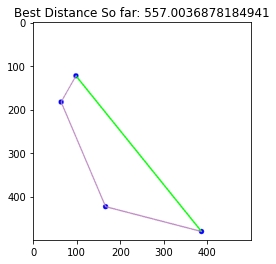

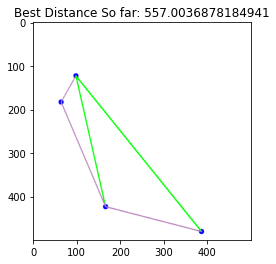

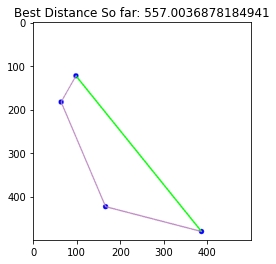

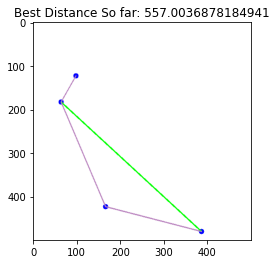

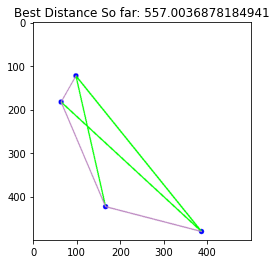

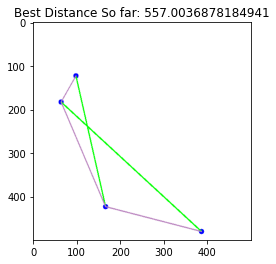

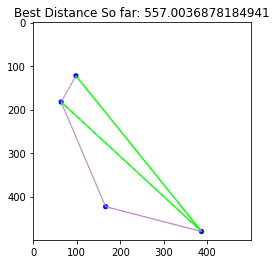

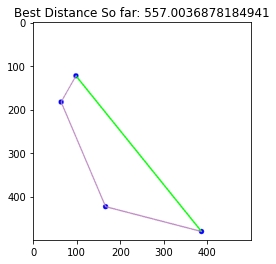

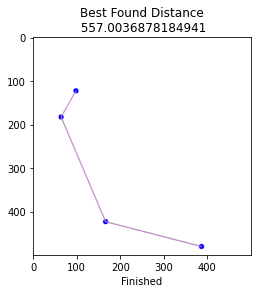

In [1]:
### Importing Dependencies

import numpy as np
import cv2
import matplotlib.pyplot as plt
from random import randint as rnd
from random import shuffle

### Setting The Problem Parameters

n_cities = 4

area_width = 500
area_height = 500

### City Randomizer Function (Initial population)

def city_randomizer(n_c, a_w, a_h):
    offset = 20
    cities = []
    i = 0
    while i < n_c:
        city_location = [rnd(offset,a_w-offset), rnd(offset,a_h-offset)]
        if city_location not in cities:
            cities.append(city_location)
            i+=1
    return cities

### Lexicographic Ordering Function

def lexicographic_ordering(n):
    def swap(_list, index1, index2):
        _list[index1], _list[index2] = _list[index2], _list[index1]
        return _list

    items = [i for i in range(n)]

    yield items

    while True:
        #step 1
        largets_i = -1
        for i in range(len(items)-1):
            if items[i] < items[i+1]:
                largets_i = i
        if largets_i == -1:
            break

        #step 2
        largest_j = 0
        for j in range(len(items)):
            if items[largets_i] < items[j]:
                largest_j = j

        #step 3
        items = swap(items, largets_i, largest_j)

        #step 4
        left_half = items[:largets_i+1]
        right_half = items[largets_i+1:]
        right_half.reverse()
        items = left_half + right_half

        yield items


### Draw Cities Dots Functions

def draw_cities(img, cities_locations):
    for x,y in cities_locations:
        img = cv2.circle(img, (x,y), 6, (0,0,255), -1)
    return img

### Draw Path Function

def draw_path(img, path, color):
    for i in range(len(path)-1):
        img = cv2.line(img, path[i], path[i+1], color, 2)
    return img

### Path Cordinates Function

def path_cordinates(cities_locations, path):
    cordinates = []
    for i in path:
        cordinates.append(cities_locations[i])
    return cordinates

### Distance Calculator Function ( euclidean distance )

def distance_calculator(path):
    length = 0
    for i in range(len(path)-1):
        length += np.sqrt((path[i][0]-path[i+1][0])**2 + (path[i][1]-path[i+1][1])**2)
    return length

if __name__ == "__main__":
    best_path = []
    best_path_distance = []
    cities = city_randomizer(n_cities, area_width, area_height)
    
    for path in lexicographic_ordering(n_cities):
        area = np.full((area_width, area_height, 3), 255, np.int16)
        area = draw_cities(area, cities)
        
        path_cord = path_cordinates(cities, path)
        
        area = draw_path(area, path_cord, (0,255,0))
        path_length = distance_calculator(path_cord)
        if len(best_path) == 0:
            best_path = path_cord
            best_path_distance = path_length
        else:
            if path_length < best_path_distance:
                best_path = path_cord
                best_path_distance = path_length

        area = draw_path(area, best_path, (187, 134, 192))

        plt.imshow(area)
        plt.title("Best Distance So far: {}".format(best_path_distance))
        plt.pause(0.5)
        plt.clf()
    area = np.full((area_width, area_height, 3), 255, np.int16)
    area = draw_cities(area, cities)
    area = draw_path(area, best_path, (187, 134, 192))
    plt.imshow(area)
    plt.title("Best Found Distance\n {}".format(best_path_distance))
    plt.xlabel("Finished")
    plt.show()
else:
    print("Please Run the main.py file!")
    

